In [3]:
import sys, os
path2add = os.path.normpath(os.path.abspath(os.path.join(os.path.curdir, os.path.pardir, '../TestBeam')))
if (not (path2add in sys.path)) :
    sys.path.append(path2add)
print(path2add)

from beamtest_analysis_helper import DecodeBinary
from natsort import natsorted
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/home/daq/ETROC2/ETROC-Analysis/TestBeam


In [ ]:
path_to_loop_dir = "/home/daq/ETROC2/ETROC-Data/NW_SEU_May2025/dryrun_FNAL/" # Change this path
files = natsorted(list(Path(path_to_loop_dir).glob('Run_0/file_*.bin')))

decoder = DecodeBinary(
    firmware_key = 0b0001,
    board_id = [0x17f0f, 0x17f0f, 0x17f0f, 0x17f0f],
    file_list = files,
    save_nem = None,
    skip_fw_filler = True,
    skip_event_df = True,
    skip_crc_df = True,
)
df, _, _, filler_df = decoder.decode_files()
del df

filtered_df = filler_df.loc[filler_df['type'] == b'40']
filtered_df.reset_index(drop=True, inplace=True)
del filler_df

Text(0, 1, 'Reset Counter')

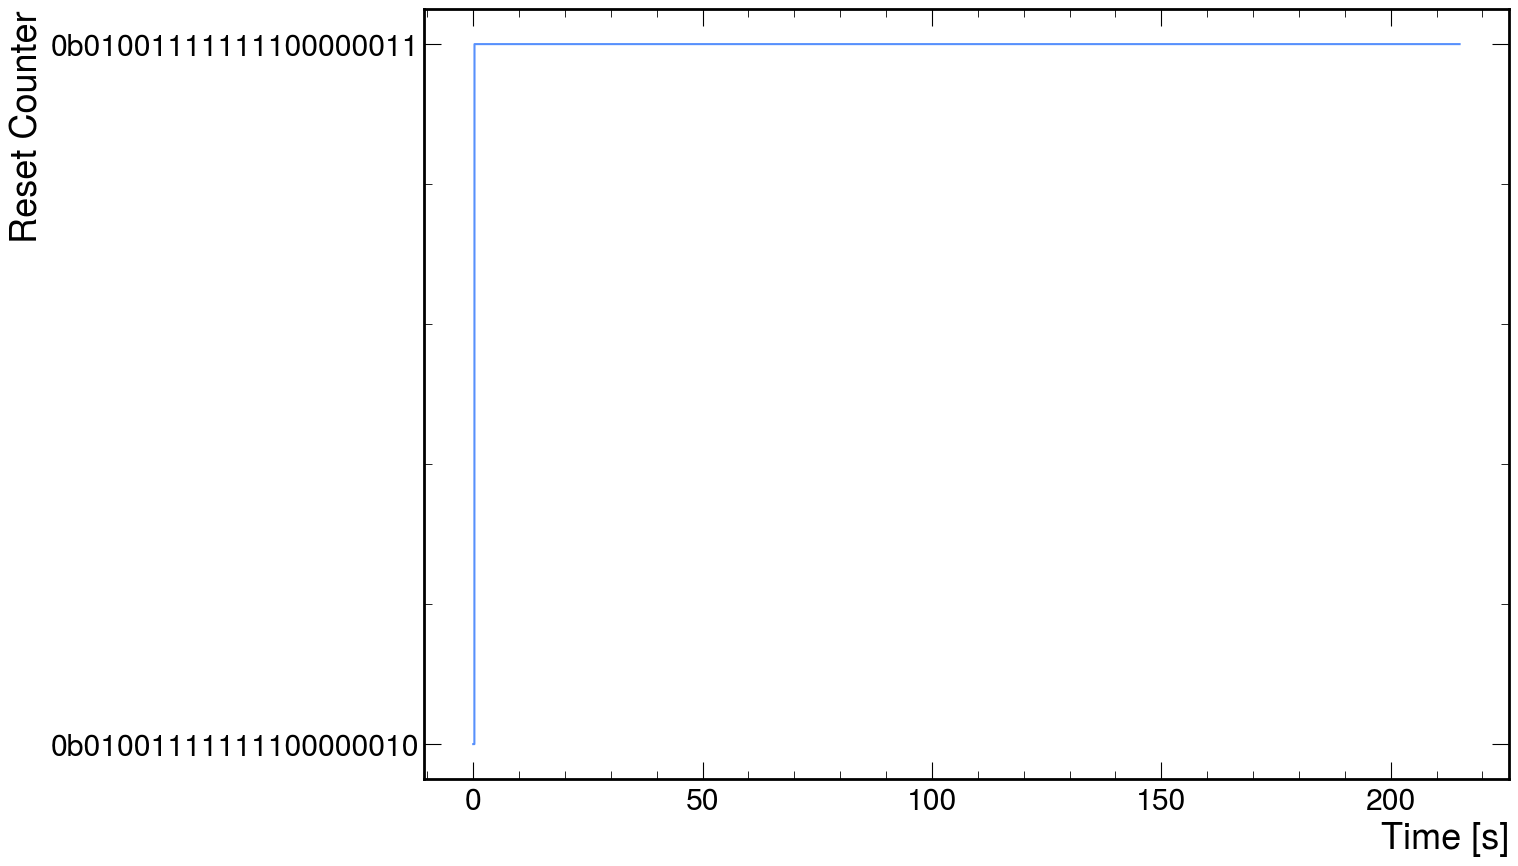

In [5]:
fig = plt.figure(figsize=(14, 10))
plt.plot(filtered_df['idx'].values*0.025, filtered_df['filler_data'].values)
plt.xlabel('Time [s]')
plt.ylabel('Reset Counter')

Text(0, 1, 'Trigger Rate [kHz]')

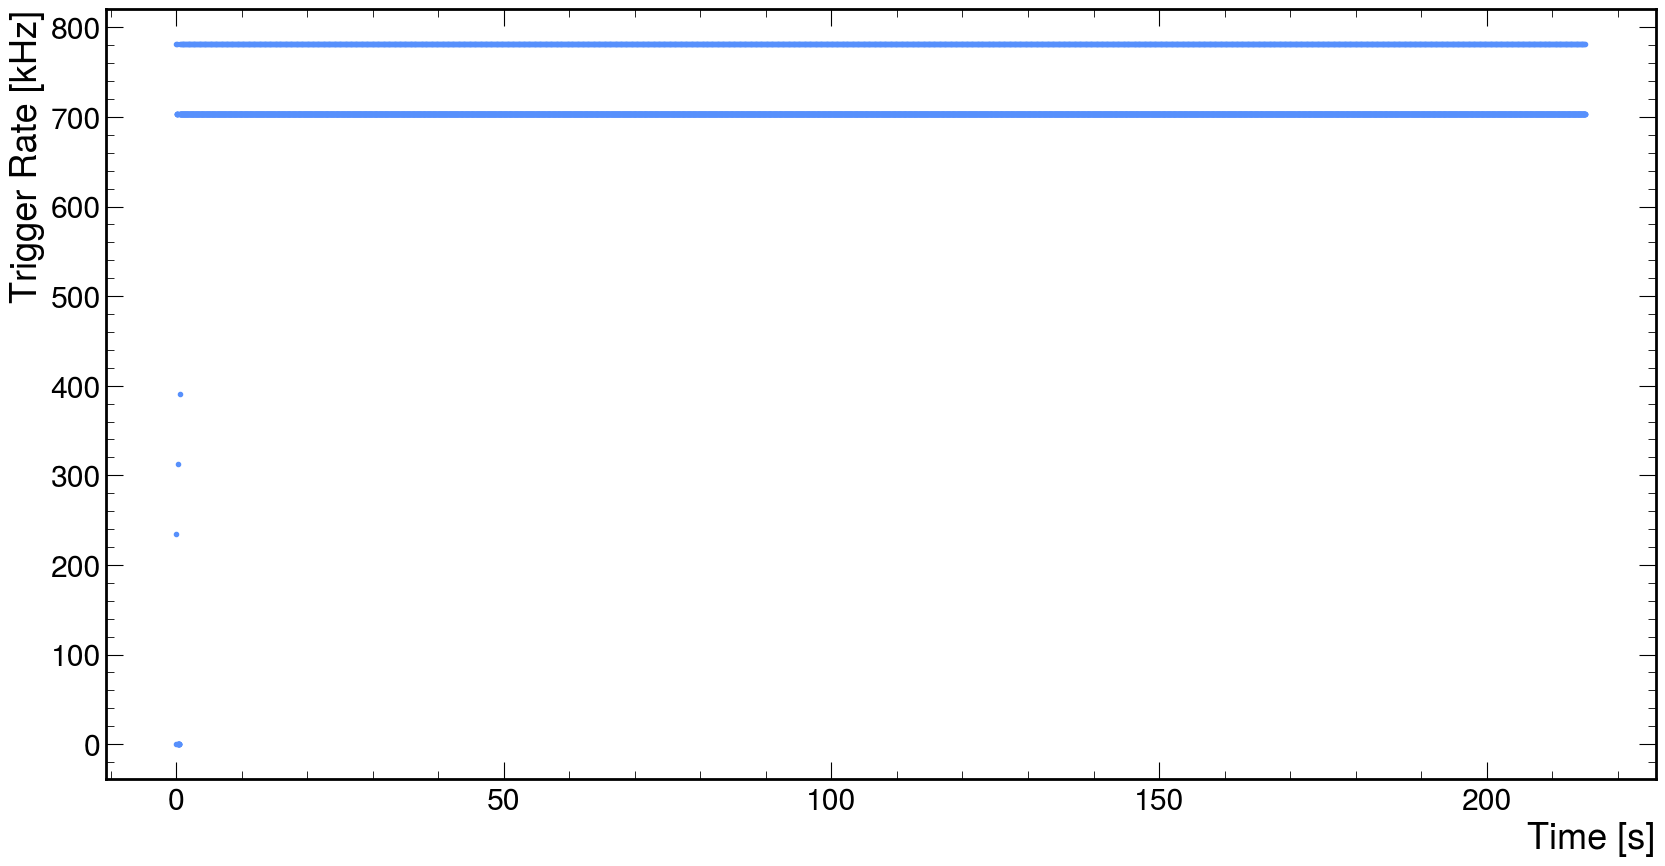

In [6]:
prescale_factor = 2048 # change prescale factor

fig = plt.figure(figsize=(20, 10))
plt.plot(filtered_df['idx'].values*0.025, prescale_factor*filtered_df['events'].values/(0.025 * 1.024**2)/1e3, '.')
plt.xlabel('Time [s]')
plt.ylabel('Trigger Rate [kHz]')

Text(0, 1, 'Trigger Rate [kHz]')

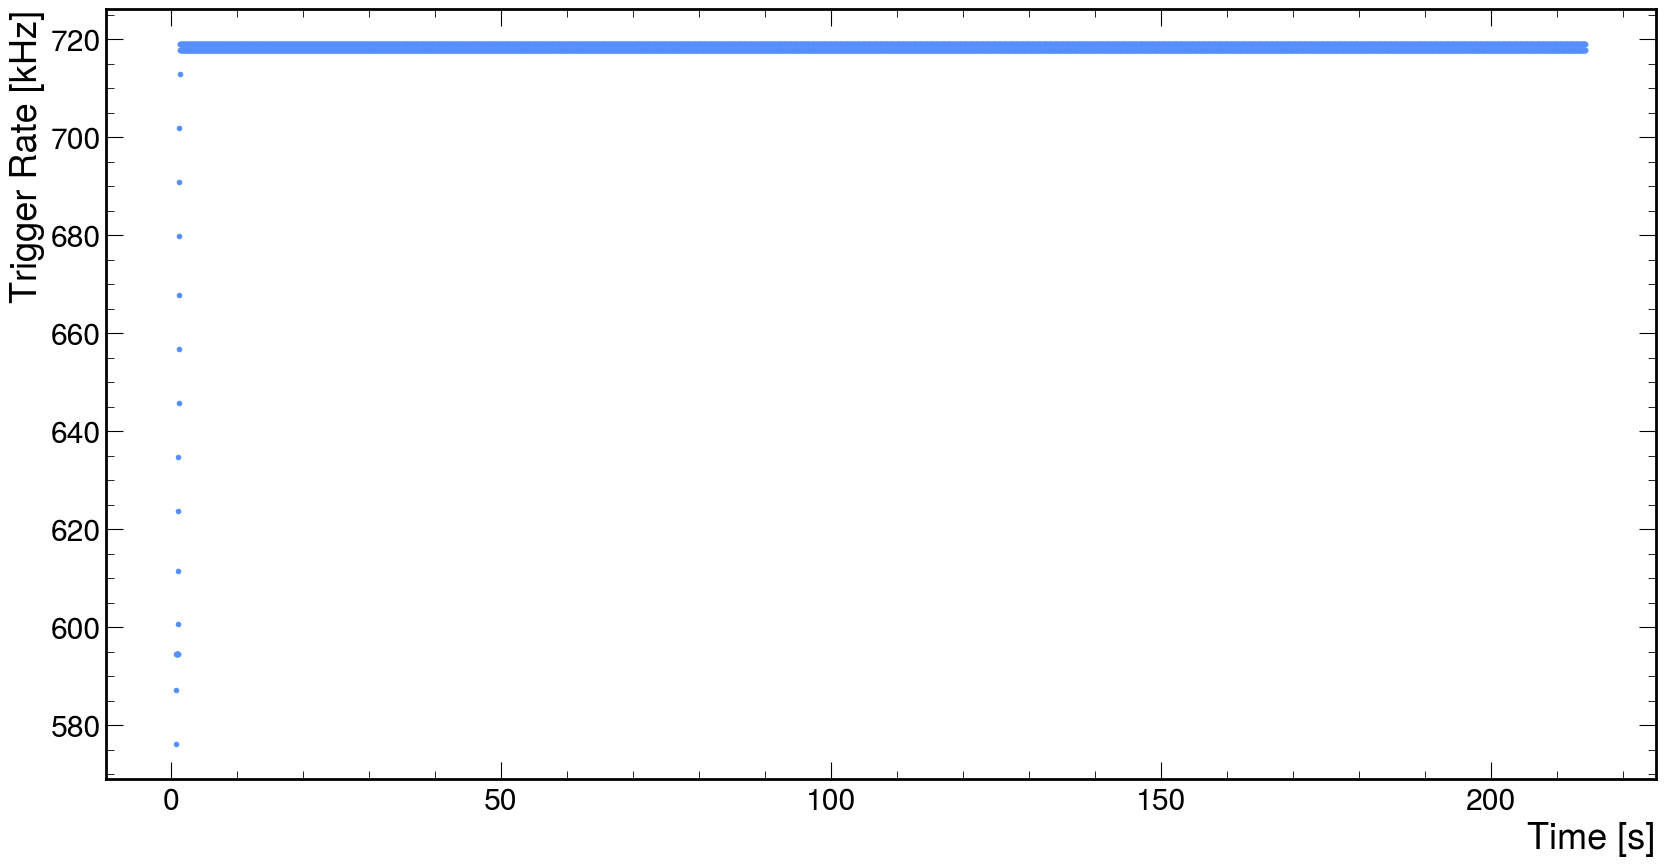

In [7]:
prescale_factor = 2048 # change prescale factor
window_size=64

fig = plt.figure(figsize=(20, 10))
plt.plot(np.convolve(filtered_df['idx'].values*0.025, np.ones(window_size)/window_size, mode='valid'), np.convolve(prescale_factor*filtered_df['events'].values/(0.025 * 1.024**2)/1e3, np.ones(window_size)/window_size, mode='valid'), '.')
plt.xlabel('Time [s]')
plt.ylabel('Trigger Rate [kHz]')